# DATA DESCRIPTION AND CLEANING


This notebook explores the df of clients of the welcome call feedback process to make a general description of the variables to be considered into a offering model


In [1]:
#LOADS LIBRARIES
import os
import sys
import warnings
warnings.simplefilter('ignore')
import pickle
#import dill as pickle

import numpy as np
import pandas as pd
import math

import time 
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#sns.reset_orig
#matplotlib.rc_file_defaults()

In [3]:
#Defines directories

INPUT_DIR = r'C:\Users\willi\Documents\EJERCICIOS\OPI\ '.strip()

OUTPUT_DIR = r'C:\Users\willi\Documents\EJERCICIOS\OPI\outputs'.strip()

## Data description

In [4]:
#Call the investigation data frame

df_invest = pd.read_pickle(OUTPUT_DIR + 'df_invest_s1.pkl')

print(df_invest.shape)
print('\n')

for c in df_invest.columns.tolist():
    print(c)

(1168250, 19)


ao_hechos
mes_hechos
ao_inicio
mes_inicio
delito
fiscalia
agencia
unidad_investigacion
categoria_delito
alcaldia_hechos
competencia
fecha_hechos
fecha_inicio
calle_hechos
calle_hechos2
colonia_hechos
_id
longitud
latitud


In [5]:
df_invest.head()

,ao_hechos,mes_hechos,ao_inicio,mes_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,alcaldia_hechos,competencia,fecha_hechos,fecha_inicio,calle_hechos,calle_hechos2,colonia_hechos,_id,longitud,latitud
0,2016,ENERO,2016,FEBRERO,DAÃO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,BENITO JUAREZ,NAN,2016-01-31,2016-02-01,CALZ. DE TLALPAN,LAGO PTE.,AMÃRICAS UNIDAS,1.0,-99.140215,19.380315
1,2016,ENERO,2016,FEBRERO,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÃN PARA LA ATENCIÃN DEL DELITO DE...,ORIENTEII,UI-3CD,ROBO DE VEHÃCULO CON Y SIN VIOLENCIA,IZTAPALAPA,NAN,2016-01-31,2016-02-01,SUR 25 A,GRANJEROS,LOS CIPRESES,2.0,-99.108403,19.352859
2,2016,FEBRERO,2016,FEBRERO,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÃN PARA LA ATENCIÃN DE NIÃOS, NI...",57,UI-3CD,DELITO DE BAJO IMPACTO,IZTAPALAPA,NAN,2016-02-01,2016-02-01,BATALLONES ROJOS,NAN,UNIDAD VICENTE GUERRERO,3.0,-99.061321,19.356451
3,2016,ENERO,2016,FEBRERO,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,IZTAPALAPA,NAN,2016-01-31,2016-02-01,GERANIO,GAVILLEROS,EMILIANO ZAPATA,4.0,-98.976379,19.331633
4,2015,DICIEMBRE,2016,FEBRERO,DENUNCIA DE HECHOS,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,BENITO JUAREZ,NAN,2015-12-25,2016-02-01,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,5.0,-99.172189,19.387114


In [6]:
#Computes the describe methode

df_invest.describe(include = 'all')

,ao_hechos,mes_hechos,ao_inicio,mes_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,alcaldia_hechos,competencia,fecha_hechos,fecha_inicio,calle_hechos,calle_hechos2,colonia_hechos,_id,longitud,latitud
count,1168250,1168250,1168250,1168250,1168250,1168250,1168250,1168250,1168250,1168250,1168250,1167817,1168250,1168250,1168250,1168250,1.168250e+06,1.121786e+06,1.121786e+06
unique,72,13,6,12,341,74,167,121,18,542,4,5751,1886,244098,109494,1660,NaN,NaN,NaN
top,2018,ENERO,2018,FEBRERO,VIOLENCIA FAMILIAR,INVESTIGACIÃN EN IZTAPALAPA,CUH-2,UI-1SD,DELITO DE BAJO IMPACTO,CUAUHTEMOC,NAN,2016-09-04 00:00:00,2020-03-06 00:00:00,CALZADA DE TLALPAN,NAN,NAN,NaN,NaN,NaN
freq,253341,108982,255311,108490,116315,114947,41397,307764,907430,182733,1064079,1046,934,4976,709215,47432,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1906-06-02 00:00:00,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-28 00:00:00,2021-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841255e+05,-9.913727e+01,1.938754e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.372449e+05,5.970431e-02,6.966443e-02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,-1.002319e+02,1.909535e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.920632e+05,-9.917550e+01,1.934020e+01


In [7]:
#Table of missing values

def missing_values_table(df):
    
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

missing_values_table(df_invest)

,Missing Values,% of Total Values
longitud,46464,4.0
latitud,46464,4.0
fecha_hechos,433,0.0


In [8]:
df_invest

,ao_hechos,mes_hechos,ao_inicio,mes_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,alcaldia_hechos,competencia,fecha_hechos,fecha_inicio,calle_hechos,calle_hechos2,colonia_hechos,_id,longitud,latitud
0,2016,ENERO,2016,FEBRERO,DAÃO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,BENITO JUAREZ,NAN,2016-01-31,2016-02-01,CALZ. DE TLALPAN,LAGO PTE.,AMÃRICAS UNIDAS,1.0,-99.140215,19.380315
1,2016,ENERO,2016,FEBRERO,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÃN PARA LA ATENCIÃN DEL DELITO DE...,ORIENTEII,UI-3CD,ROBO DE VEHÃCULO CON Y SIN VIOLENCIA,IZTAPALAPA,NAN,2016-01-31,2016-02-01,SUR 25 A,GRANJEROS,LOS CIPRESES,2.0,-99.108403,19.352859
2,2016,FEBRERO,2016,FEBRERO,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÃN PARA LA ATENCIÃN DE NIÃOS, NI...",57,UI-3CD,DELITO DE BAJO IMPACTO,IZTAPALAPA,NAN,2016-02-01,2016-02-01,BATALLONES ROJOS,NAN,UNIDAD VICENTE GUERRERO,3.0,-99.061321,19.356451
3,2016,ENERO,2016,FEBRERO,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,IZTAPALAPA,NAN,2016-01-31,2016-02-01,GERANIO,GAVILLEROS,EMILIANO ZAPATA,4.0,-98.976379,19.331633
4,2015,DICIEMBRE,2016,FEBRERO,DENUNCIA DE HECHOS,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,BENITO JUAREZ,NAN,2015-12-25,2016-02-01,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,5.0,-99.172189,19.387114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168245,2021,FEBRERO,2021,FEBRERO,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,FISCALÃA DE INVESTIGACIÃN TERRITORIAL EN GUS...,GAM-2,UI-1CD,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,FUERO COMUN,2021-02-27,2021-02-28,6-A,NAN,SANTA ROSA,1168246.0,-99.164998,19.520712
1168246,2021,FEBRERO,2021,FEBRERO,AMENAZAS,FISCALÃA DE INVESTIGACIÃN TERRITORIAL EN AZC...,AZ-4,UI-1SD,DELITO DE BAJO IMPACTO,AZCAPOTZALCO,FUERO COMUN,2021-02-27,2021-02-28,PRIMERA CERRADA DE CANDIDO NAVARRO,NAN,SAN JUAN TLIHUACA,1168247.0,-99.201729,19.490560
1168247,2021,FEBRERO,2021,FEBRERO,ROBO A CASA HABITACION SIN VIOLENCIA,FISCALÃA DE INVESTIGACIÃN TERRITORIAL EN IZT...,IZP-9,UI-1SD,DELITO DE BAJO IMPACTO,IZTAPALAPA,FUERO COMUN,2021-02-28,2021-02-28,PUERTO ESCONDIDO MZ B LOTE 59,NAN,LA POLVORILLA,1168248.0,-99.047244,19.316534
1168248,2021,FEBRERO,2021,FEBRERO,VIOLENCIA FAMILIAR,FISCALÃA DE INVESTIGACIÃN TERRITORIAL EN TLÃ...,UAT-TLH-1,2 SIN DETENIDO,DELITO DE BAJO IMPACTO,TLAHUAC,FUERO COMUN,2021-02-28,2021-02-28,VILLA DE CORTES,NAN,LA ESTACIÃN,1168249.0,-99.042367,19.311810


In [9]:
# Defines ctegorical and numerical variables

df_informats = df_invest.dtypes.reset_index()
df_informats

ls_catcols = []
ls_numcols = []
for i in range(len(df_informats)):
    
    df_row = df_informats.iloc[i,:]
    column = df_row.iloc[0]
    formatt = str(df_row.iloc[1])
    
    if formatt=='object':
        ls_catcols.append(column)
    if 'date' in formatt:
        ls_catcols.append(column)
        
    if 'int' in formatt:
        ls_numcols.append(column)
    if 'float' in formatt:
        ls_numcols.append(column)

        
for c in ls_catcols:
    print(c)

print('\n')

for c in ls_numcols:
    print(c)

ao_hechos
mes_hechos
ao_inicio
mes_inicio
delito
fiscalia
agencia
unidad_investigacion
categoria_delito
alcaldia_hechos
competencia
fecha_hechos
fecha_inicio
calle_hechos
calle_hechos2
colonia_hechos


_id
longitud
latitud


From the above lists, it should been excluded the following type of variables:
    - Keys variables (documentid, clientid, policy number, etc )
    - Variables the cannot be reproduced in production conditions

In [10]:

#key variables to identify the registers
ls_keycols = [
    '_id',
    'longitud',
    'latitud'
]


#Categorical variables that can be obtained in production conditions
ls_catcols = [
'ao_hechos',
'mes_hechos',
'ao_inicio',
'mes_inicio',
'delito',
'fiscalia',
'agencia',
'unidad_investigacion',
'categoria_delito',
'alcaldia_hechos',
'competencia',
#'fecha_hechos',
#'fecha_inicio',
#'calle_hechos',
#'calle_hechos2',
'colonia_hechos',
]

#Numerical variables that can be obtained in production conditions
ls_numcols = [
]

ls_targetcols = [  
]

In [11]:
#Available variables for inspection

df_invest_01 = df_invest[ls_keycols + ls_catcols + ls_numcols + ls_targetcols]

i = 0
for c in df_invest_01.columns.tolist():
    print(i , '-' , c)
    i = i+1

0 - _id
1 - longitud
2 - latitud
3 - ao_hechos
4 - mes_hechos
5 - ao_inicio
6 - mes_inicio
7 - delito
8 - fiscalia
9 - agencia
10 - unidad_investigacion
11 - categoria_delito
12 - alcaldia_hechos
13 - competencia
14 - colonia_hechos


In [12]:
print(df_invest_01['competencia'].value_counts(dropna=False).reset_index().sort_values(['index']))

                index  competencia
1         FUERO COMUN       101297
2  HECHO NO DELICTIVO         1917
3       INCOMPETENCIA          957
0                 NAN      1064079


In [13]:
#Creates real crime indicator

df_invest_01['i_delito'] = 0
df_invest_01.loc[df_invest_01['competencia'].isin(['NAN']),'i_delito']=1

print(df_invest_01['i_delito'].value_counts(dropna=False).reset_index().sort_values(['index']))

   index  i_delito
1      0    104171
0      1   1064079


In [14]:
# Some of year reporting
c = 'ao_inicio'
target = 'i_delito'

df_var = df_invest_01[[c,target]]

df_cats = df_var.groupby([c]).agg(
                        Frequency = (c,'count'),
                        Target = (target,'sum'),
)

df_cats = df_cats.reset_index()
df_cats['pp_target'] = df_cats['Target']/sum(df_cats['Frequency'])
df_cats

,ao_inicio,Frequency,Target,pp_target
0,2016,197913,197913,0.169410
1,2017,228323,228323,0.195440
2,2018,255311,255311,0.218541
3,2019,250386,250386,0.214326
4,2020,204036,132146,0.113114
5,2021,32281,0,0.000000


In [15]:
# Funciton to compute descriptions for categorical variables

def description_catcols(df_input,c,target=None):
    
    if target:
        df_var = df_input[[c,target]]
    else:
        df_var = df_input[[c]]
        target = 'target_added'
        df_var[target] = 0

    #Defines the structure od the plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    grid = plt.GridSpec(2, 2, wspace=0.1, hspace=1.5)

    axes[0,0] = plt.subplot(grid[0, 0:])
    axes[1,0] = plt.subplot(grid[1, 0])
    axes[1,1] = plt.subplot(grid[1, 1])


    fig.suptitle('Description for: (' + c + ')')

    df_cats = df_var.groupby([c]).agg(
                        Frequency = (c,'count'),
                        Target = (target,'sum'),
                        )

    
    df_cats = df_cats.reset_index()
    df_cats['%Frequency'] = round(100 * df_cats['Frequency']/sum(df_cats['Frequency']),2)
    df_cats['Target_ratio'] = df_cats['Target']/df_cats['Frequency']
    df_cats['Target_ratio_tt'] = sum(df_cats['Target'])/sum(df_cats['Frequency'])
    
    
    df_cats.plot.bar(x=c, y='Frequency', rot=0, legend=False, title="Frequency plot for: (" + c + ")", ax =axes[0,0])
    
    if target != 'target_added':
        twin1 = axes[0,0].twinx()
        twin1.set_ylim(0, max(df_cats['Target_ratio']))
        twin1.set_ylabel("Target_ratio")

        sns.pointplot(x=c, y='Target_ratio', data=df_cats, color='red', ax =twin1)
        sns.pointplot(x=c, y='Target_ratio_tt', data=df_cats, color='orange', ax =twin1)
    
    
    
    axes[0,0].tick_params(axis='x', labelsize=8 , rotation=90)


    #Table of main statistical descriptions
    df_desc = df_var[c].describe(include = 'all').reset_index()
    df_desc = df_desc.rename(columns={c:'result','index':c})
    collabel=df_desc.columns.tolist()
    table1 = axes[1,0].table(cellText=df_desc.values,colLabels=collabel,loc='center')
    axes[1,0].title.set_text("Main statistics")
    axes[1,0].axis("off")


    df_cats_2 = df_cats[[c,'Frequency','%Frequency']]
    
    if len(c) > 15:
        c2 = c[0:6] + '...' + c[-6:]
        df_cats_2 = df_cats_2.rename(columns={c:c2})
    
    df_cats_2 = df_cats_2.sort_values(['Frequency'],ascending=[False]).head(10)
    #print(df_cats.head(20))
    collabel=df_cats_2.columns.tolist()
    table2 = axes[1,1].table(cellText=df_cats_2.values,colLabels=collabel,loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(10)
    table2.scale(1, 1.2)
    
    axes[1,1].title.set_text("Top 10 frequencies")
    axes[1,1].axis("off")

    

    plt.show()
    plt.close()

#description_catcols(df_input,'tipo_de_transacción')
#description_catcols(df_input,'ciudad')

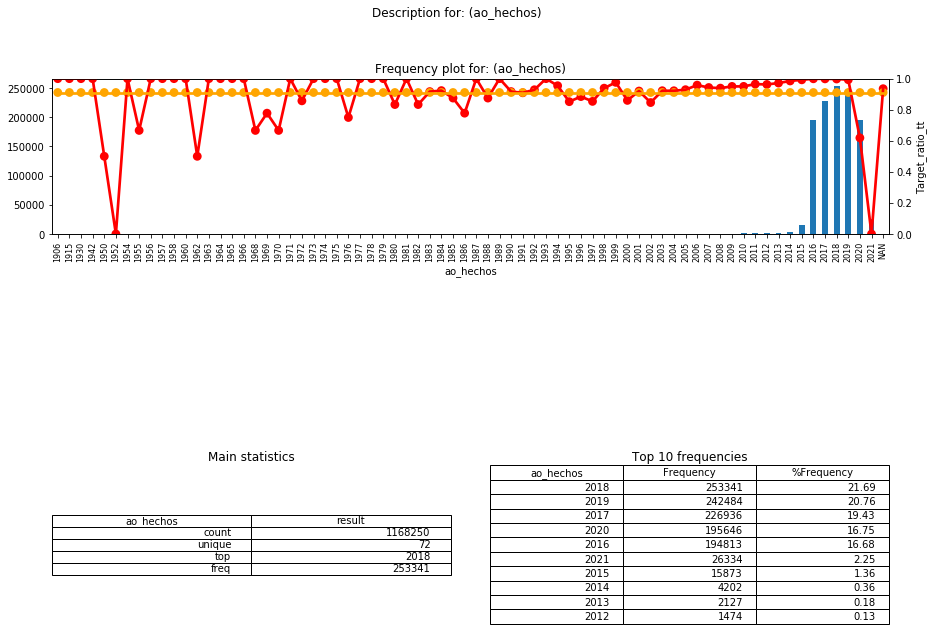

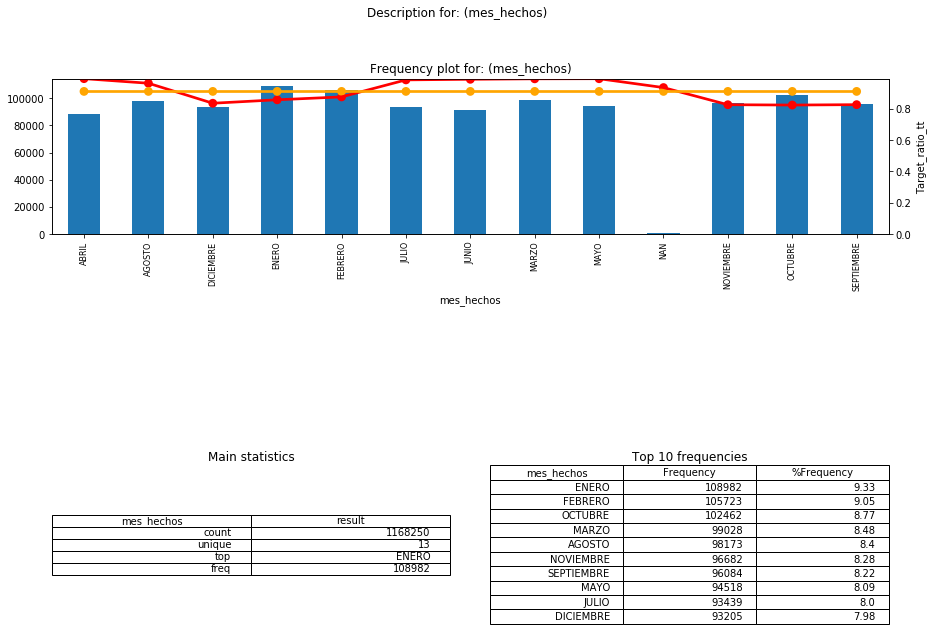

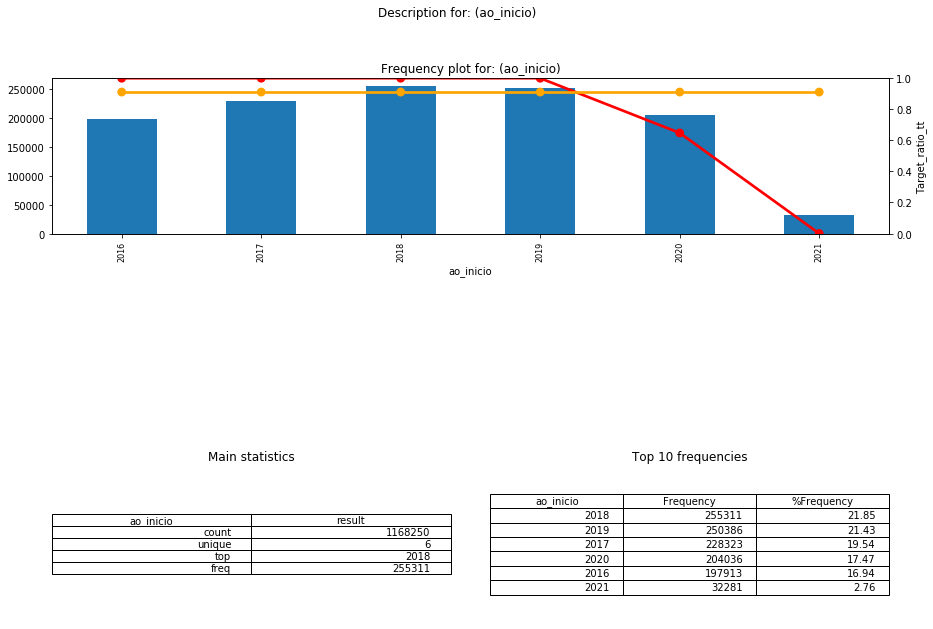

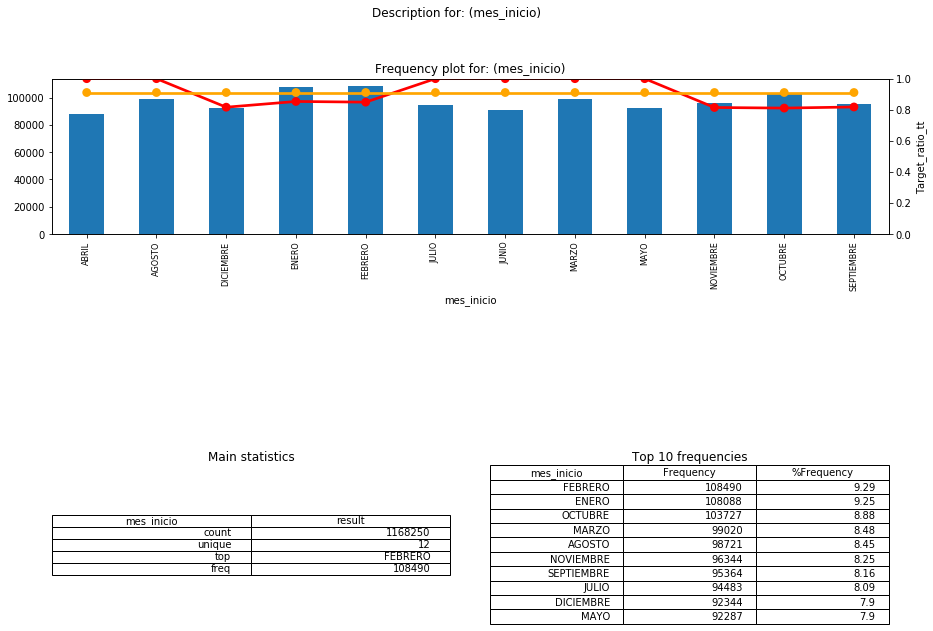

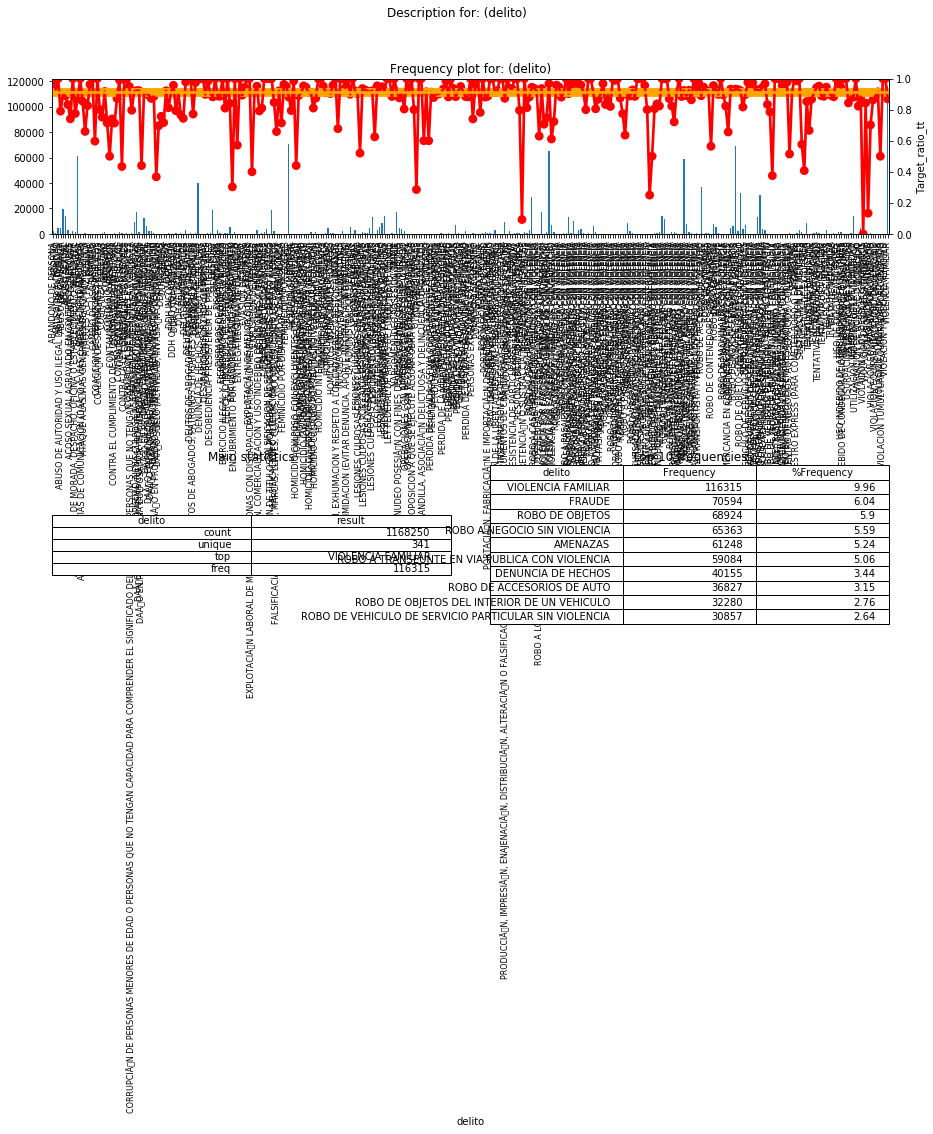

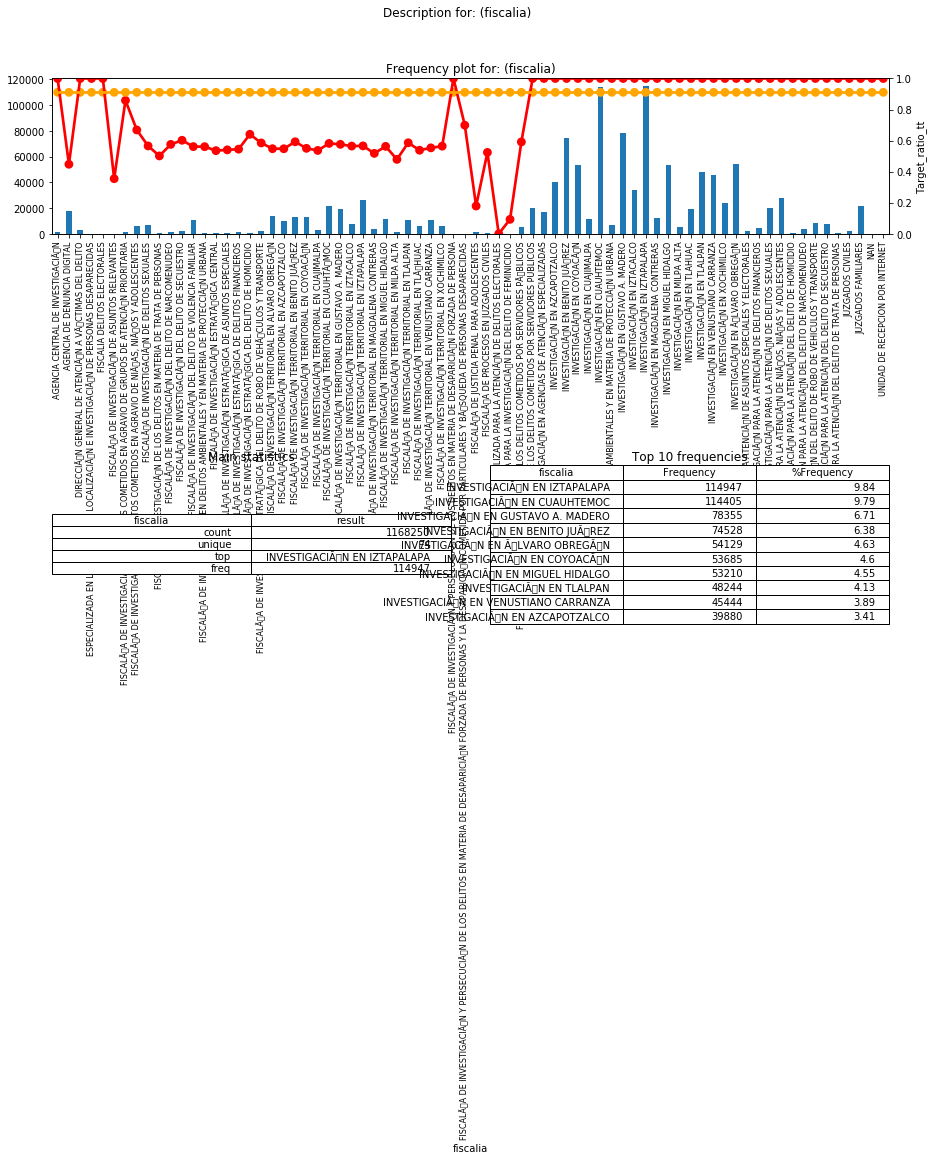

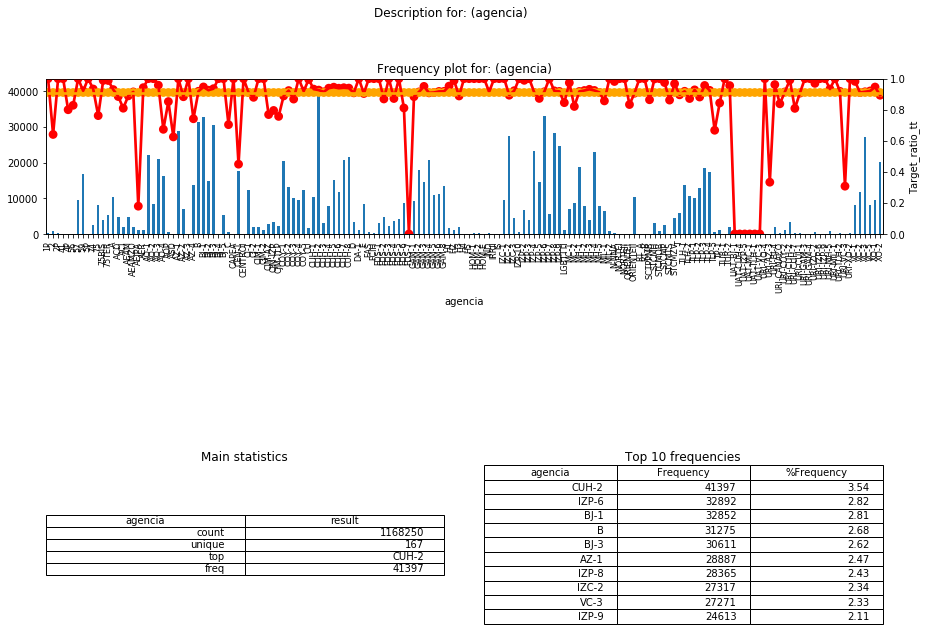

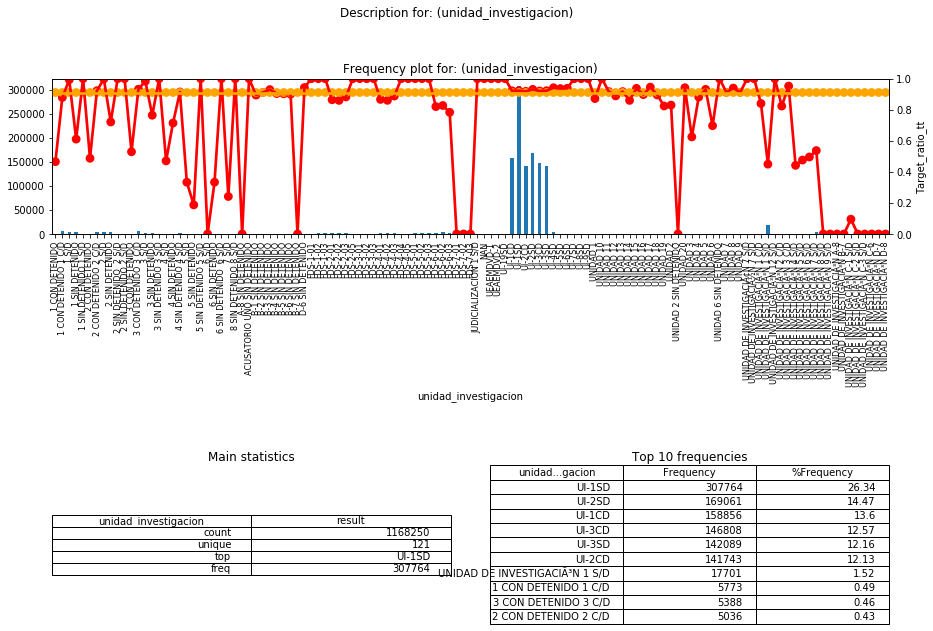

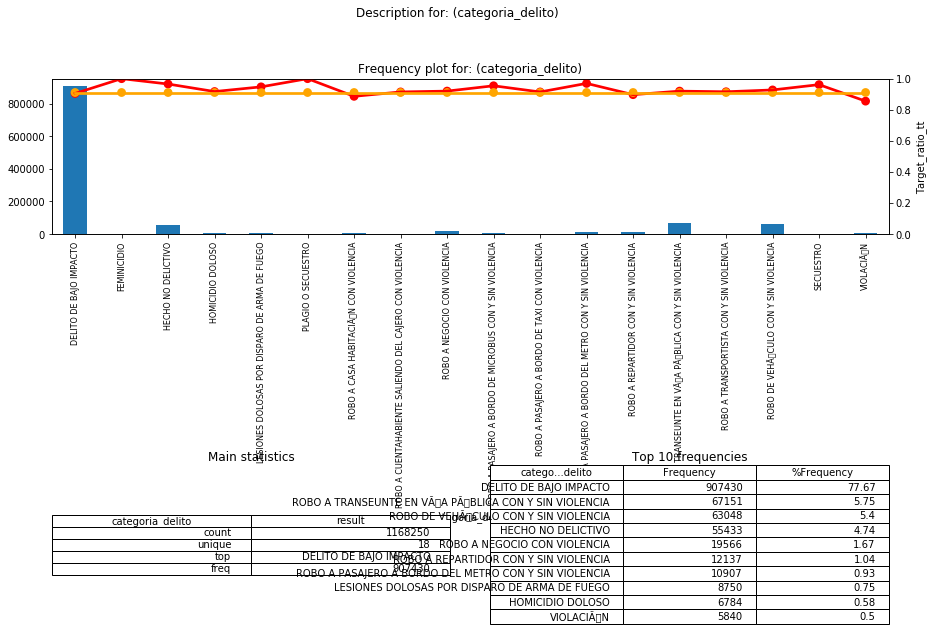

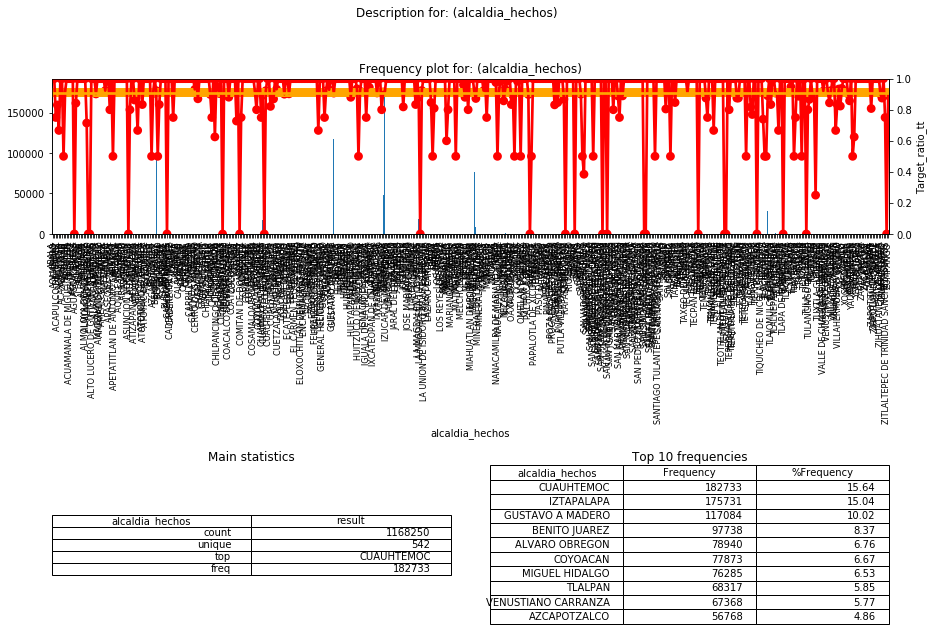

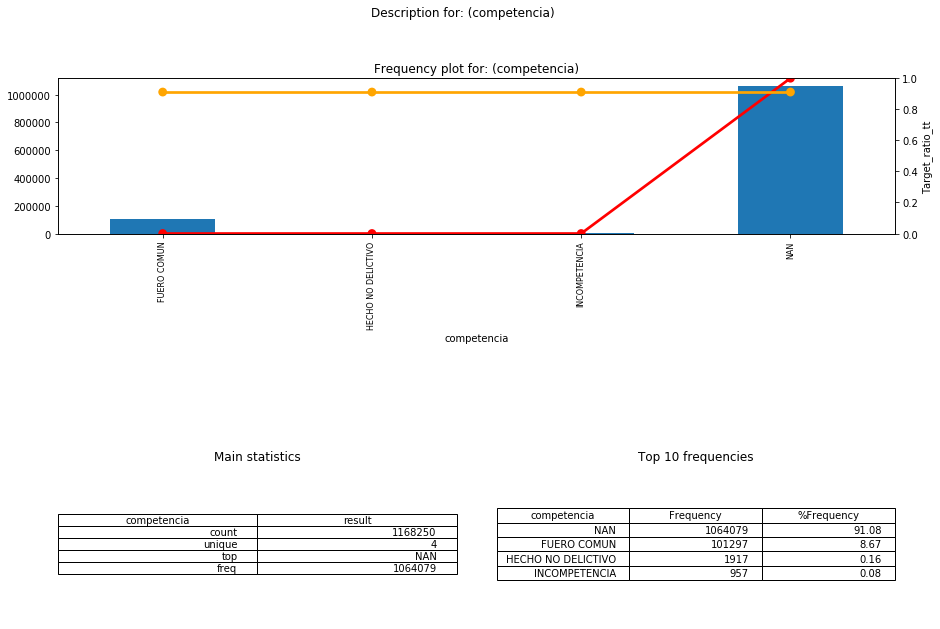

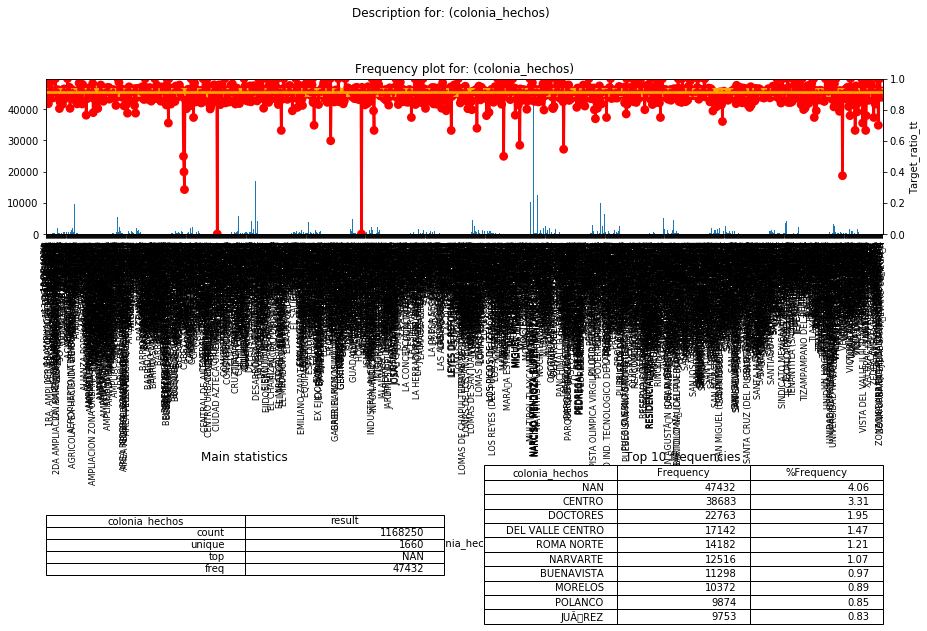

In [16]:
#Observes the categorical data

df_input = df_invest_01.copy()

for c in ls_catcols:
    description_catcols(df_input,c,'i_delito')

In [119]:
# Funciton to compute descriptions for numerical variables

def description_numcols(df_input,c,target=None):

    if target:
        df_var = df_input[[c,target]]
    else:
        df_var = df_input[[c]]

    #Defines the structure od the plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Description for: (' + c + ')')

    
    if target:
        #Histogram plot
        sns.distplot(df_var[df_var[target]==1][c],
                     hist=True, 
                     kde=True, 
                     bins=20, 
                     color = 'darkred', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 4},
                     label='Target',
                     ax=axes[0,0])

        sns.distplot(df_var[df_var[target]==0][c],
                     hist=True, 
                     kde=True, 
                     bins=20, 
                     color = 'darkblue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 4},
                     label='No target',
                     ax=axes[0,0])
    

    
    
        #Boxplot
        df_var.boxplot(by = target, figsize=(10,7),ax=axes[0,1])
        axes[0,1].set_xlabel("Target")
    
    else:
        #Histogram plot
        sns.distplot(df_var[c],
                     hist=True, 
                     kde=True, 
                     bins=20, 
                     color = 'darkred', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 4},
                     label='Total',
                     ax=axes[0,0])
        
        #Boxplot
        df_var.boxplot(figsize=(10,7),ax=axes[0,1])
        axes[0,1].set_xlabel("Total")

    axes[0,0].legend(loc="best")
    
    #Table of main statistical descriptions
    df_desc = df_var[c].describe(include = 'all').reset_index()
    df_desc = df_desc.rename(columns={c:'result','index':c})
    collabel=df_desc.columns.tolist()
    the_table = axes[1,0].table(cellText=df_desc.values,colLabels=collabel,loc='center')
    axes[1,0].axis("off")
    axes[1,0].title.set_text("Main statistics")


    #Table of bins
    df_var['var_bins'] = pd.cut(df_var[c], 20, duplicates='drop')
    df_var['var_bins'] = df_var['var_bins'].cat.codes.apply(lambda x: "{:02d}".format(x+1)) + '-' + df_var['var_bins'].astype(str)

    df_bins = df_var['var_bins'].value_counts(dropna=False).reset_index().sort_values(['index'])
    df_bins = df_bins.rename(columns={'var_bins':'Frequency','index': c + ' (bins)'})
    df_bins['%Frequency'] = round(100 * df_bins['Frequency']/sum(df_bins['Frequency']),2)
    

    collabel=df_bins.columns.tolist()
    table_2 = axes[1,1].table(cellText=df_bins.values,colLabels=collabel,loc='center')
    table_2.auto_set_font_size(False)
    table_2.set_fontsize(10)
    table_2.scale(1.2, 1.2)
    
    axes[1,1].axis("off")
    axes[1,1].title.set_text("Variable Bins")

    plt.show()
    plt.close()

    
# description_numcols(df_input,'edad_cliente','i_efectivo')
# description_numcols(df_input,'cantidad_contactos')

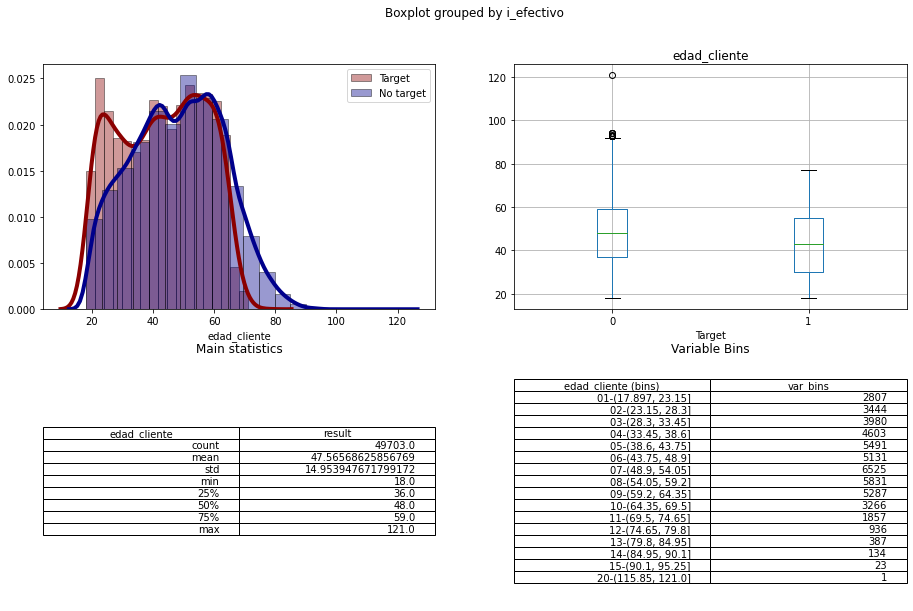

In [120]:
for c in ls_numcols:
    description_numcols(df_input,c,'i_efectivo')